In [1]:
import os.path

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


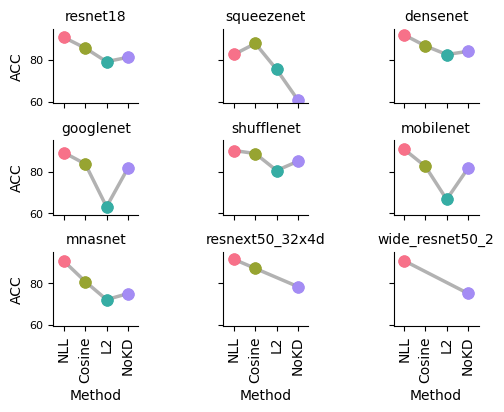

In [42]:
df = pd.read_csv("vision_table_full.csv")

id_vars = ["Method", "Model"]
value_vars = [d for d in df.columns if d not in id_vars]

df = df.melt(id_vars=id_vars, value_vars=value_vars, var_name="Dataset", value_name="ACC")

order= ["NLL", "Cosine", "L2", "NoKD"]

g = sns.catplot(
    data=df,
    x="Method",
    y="ACC",
    hue="Method",
    kind="point",
    palette="husl",
    col = "Model",
    sharey=False,
    height=1.3,
    aspect = 1.3,
    legend=False,
    col_wrap=3,
    order=order,
    hue_order=order,
    errorbar = None
)
g.map(sns.lineplot, "Method", "ACC", errorbar=None, color="black", alpha = 0.3, linewidth=2.5,legend=False)
g.map(sns.pointplot, "Method", "ACC", "Method", palette="husl", errorbar=None, alpha = 1, legend=False,
    order=order,
    hue_order=order,)


g.set_titles(col_template="{col_name}")

g.tick_params(axis = 'x',rotation=90)
g.tick_params(axis = 'y', labelsize=8)

g.figure.subplots_adjust(wspace=1.0, hspace=0.5)

axes = g.axes.flatten()
for i,d in enumerate(df.Model.unique()):
    ax = axes[i]
    df_dataset = df[df["Model"] == d]
    ax.set_ylim(top = 95)
plt.savefig("vision_baseline_comp.pdf", bbox_inches='tight')

/export/livia/home/vision/Bkarimian/miniconda3/envs/env/lib/python3.10/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/export/livia/home/vision/Bkarimian/miniconda3/envs/env/lib/python3.10/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)


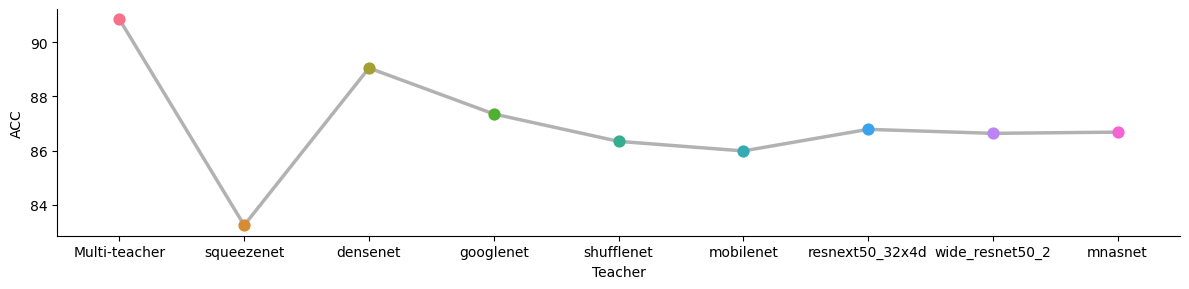

In [44]:
df = pd.read_csv("vision_fig1.csv")
g = sns.FacetGrid(df, aspect = 4)
g.map(sns.lineplot, data = df, x = "Teacher", y = "ACC", errorbar=None, color="black", alpha = 0.3, linewidth=2.5,legend=False)
g.map(sns.pointplot, data = df,x="Teacher", y="ACC", errorbar=None, palette="husl", alpha = 1, legend=False)
plt.savefig("vision_single_teacher.pdf", bbox_inches='tight')
